In [5]:
import pandas as pd
import matplotlib as plt
import re

associativity = [1, 2, 8]

%matplotlib inline

In [6]:
def read_stats(stat):
    values = []
    
    for size in associativity:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/7/7.2/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

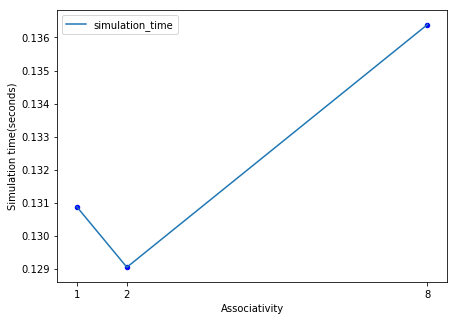

In [7]:
# Cache size vs simulation seconds
assoc = pd.Series(associativity, name='associativity')
simulation_time = read_stats("sim_seconds").rename("simulation_time")

df = pd.concat([assoc, simulation_time], axis=1)

ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='simulation_time', c='blue', ax=ax)

ax.set_xlabel('Associativity')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.associativity)

   cache_size       cpi
0          64  5.462638
1        8192  1.132179
2       16384  1.053784
3       32768  0.975072
4       65536  0.966107


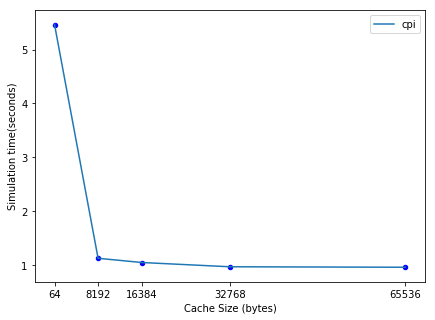

In [9]:
# Cache size vs simulation seconds
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
cpi = read_stats("system.cpu.cpi_total").rename("cpi")

df = pd.concat([cache_sizes_series, cpi], axis=1)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='cpi', c='blue', ax=ax)
print(df)
ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.cache_size)